In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as T
import torch
import numpy as np
from patchify import patchify, unpatchify

In [2]:
voc_dir = 'C:/Users/Hayden/Machine Learning/d2l/d2l-en/pytorch/chapter_computer-vision/data/VOCdevkit/VOC2012/'

In [3]:
def get_image_dimensions(folder_path):
    min_width = float('inf')
    max_width = float('-inf')
    min_height = float('inf')
    max_height = float('-inf')
    total_width = 0
    total_height = 0
    total_images = 0
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.webp'))]

    if not image_files:
        print("No image files found in the folder.")
        return None

    for file_name in image_files:
        file_path = os.path.join(folder_path, file_name)
        try:
            with Image.open(file_path) as img:
                width, height = img.size
                min_width = min(min_width, width)
                max_width = max(max_width, width)
                min_height = min(min_height, height)
                max_height = max(max_height, height)
                total_width = total_width + width
                total_height = total_height + height
                total_images = total_images + 1
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

    return {
        'min_width': min_width,
        'max_width': max_width,
        'min_height': min_height,
        'max_height': max_height,
        'total_width': total_width,
        'total_height': total_height,
        'total_images': total_images
    }

# Example usage
result = get_image_dimensions(os.path.join(voc_dir, 'SegmentationClass'))
if result:
    print("Image Dimension Summary:")
    print(f"Min Width: {result['min_width']}")
    print(f"Max Width: {result['max_width']}")
    print(f"Min Height: {result['min_height']}")
    print(f"Max Height: {result['max_height']}")
    print(f"Average Width: {result['total_width'] / result['total_images']}")
    print(f"Average Height: {result['total_height'] / result['total_images']}")


Image Dimension Summary:
Min Width: 174
Max Width: 500
Min Height: 112
Max Height: 500
Average Width: 471.9289392378991
Average Height: 384.6728458633711


In [4]:
def read_images(data_dir, dataset_type):
    '''Reads and returns all images and their respective masks.'''
    annotations_file = os.path.join(data_dir, 'ImageSets', 'Segmentation', 'train.txt' if dataset_type else 'val.txt')
    rgb_mode = torchvision.io.image.ImageReadMode.RGB

    with open(annotations_file, 'r') as f:
        image_names = f.read().split()
    
    images, masks = [], []
    for file_name in image_names:
        images.append(
            torchvision.io.read_image(os.path.join(data_dir, 'JPEGImages', f'{file_name}.jpg'))
        )
        masks.append(
            torchvision.io.read_image(os.path.join(data_dir, 'SegmentationClass', f'{file_name}.png'), rgb_mode)
        )
    
    return images, masks, image_names

In [5]:
def patch_image(patch_size, img_dir):
    '''Converts an image into several patches.'''
    img = Image.open(img_dir).convert('RGB')

    # Compute padding needed to make dimensions divisible by patch_size
    pad_h = (patch_size - img.height % patch_size) % patch_size
    pad_w = (patch_size - img.width  % patch_size) % patch_size
    pad = T.Pad((0, 0, pad_w, pad_h))  # Pad right and bottom
    img_padded = pad(img)

    img_array = np.array(img_padded)
    patches = patchify(img_array, (patch_size, patch_size, 3), step=patch_size)

    # print(patches.shape)
    return patches

def read_and_patch_images(data_dir, dataset_type):
    annotations_file = os.path.join(data_dir, 'ImageSets', 'Segmentation', dataset_type+'.txt')

    with open(annotations_file, 'r') as f:
        image_names = f.read().split()
    
    images, masks = [], []
    for file_name in image_names:
        images.extend(
            patch_image(128, os.path.join(data_dir, 'JPEGImages', f'{file_name}.jpg'))
        )
        masks.extend(
            patch_image(128, os.path.join(data_dir, 'SegmentationClass', f'{file_name}.png'))
        )
    # print(len(images[0]), len(images[0][1]), len(images[0][1][2]), len(images[3]))
    images, masks = np.concatenate(images), np.concatenate(masks)
    # print(images.shape, masks.shape)
    # print('rapi:', images[0].shape)
    return images, masks

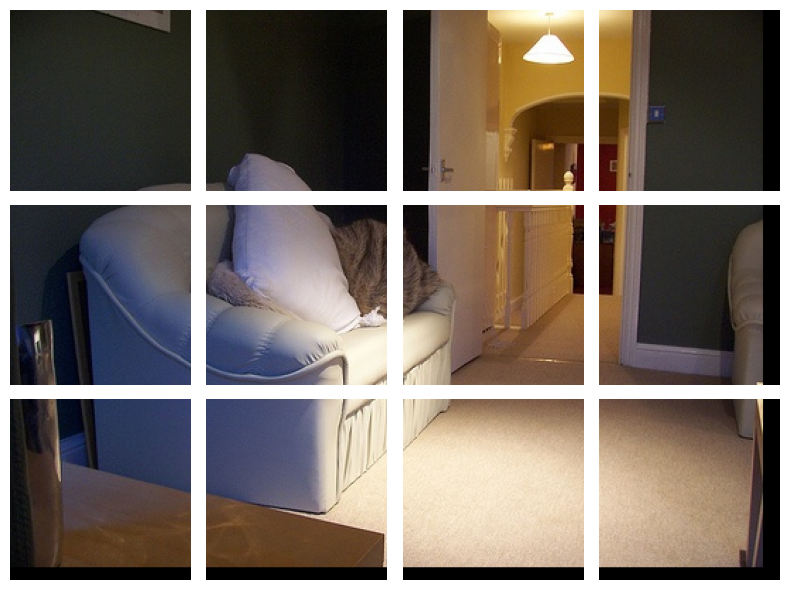

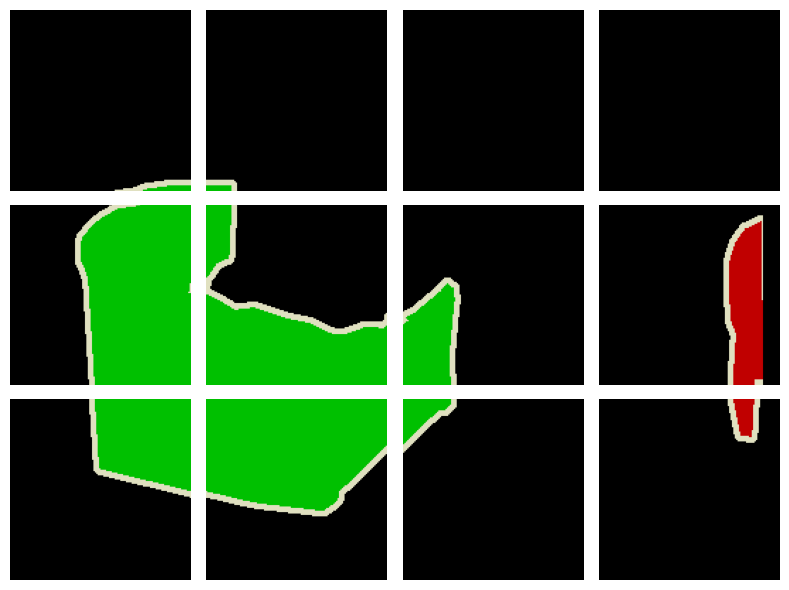

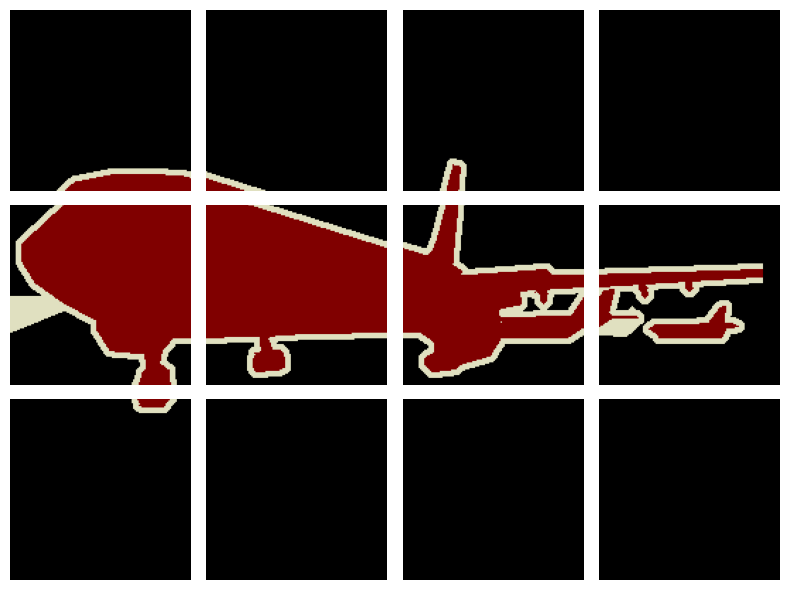

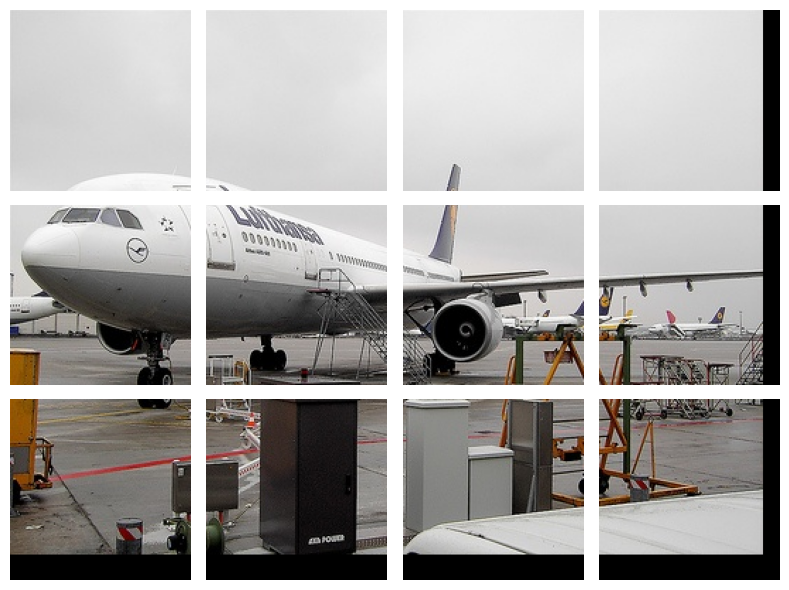

In [ ]:
def display_patches(patches):
    '''Displays all patches in an image in their respective positions in the image.'''
    n_rows, n_cols = patches.shape[0], patches.shape[1]
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*2, n_rows*2))

    for i in range(n_rows):
        for j in range(n_cols):
            patch = patches[i, j, 0]  # shape: (patch_size, patch_size, 3)
            axes[i, j].imshow(patch)
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

image = os.path.join(
    'C:/Users/Hayden/Machine Learning/d2l/d2l-en/pytorch/chapter_computer-vision/data/VOCdevkit/VOC2012/JPEGImages/',
    read_images(voc_dir, False)[2][10] + '.jpg'
)
display_patches(patch_image(128, image))
mask = os.path.join(
    'C:/Users/Hayden/Machine Learning/d2l/d2l-en/pytorch/chapter_computer-vision/data/VOCdevkit/VOC2012/SegmentationClass/',
    read_images(voc_dir, False)[2][10] + '.png'
)
display_patches(patch_image(128, mask))

display_patches(patch_image(128, 'C:/Users/Hayden/Machine Learning/d2l/d2l-en/pytorch/chapter_computer-vision/data/VOCdevkit/VOC2012/JPEGImages/2007_000033.jpg'))
patches1 = patch_image(128, 'C:/Users/Hayden/Machine Learning/d2l/d2l-en/pytorch/chapter_computer-vision/data/VOCdevkit/VOC2012/SegmentationClass/2007_000033.png')
display_patches(patches1)